## **Kmeans**

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=1000, n_features=2)
df = pd.DataFrame(data[0], columns=['Feature1', 'Feature2'])

In [6]:
df.head()

,Feature1,Feature2
0,3.097701,0.741286
1,3.475438,0.169578
2,-9.254224,6.571341
3,-10.142025,7.301631
4,3.046299,-2.417402


In [7]:
df.shape

(1000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature1,1000.0,0.653846,7.212841,-12.318212,-8.318484,2.839485,7.420670,10.746228
Feature2,1000.0,5.399010,3.709742,-3.326106,1.136948,6.892403,8.288193,12.477964


In [10]:
df.isnull().sum()

Feature1    0
Feature2    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

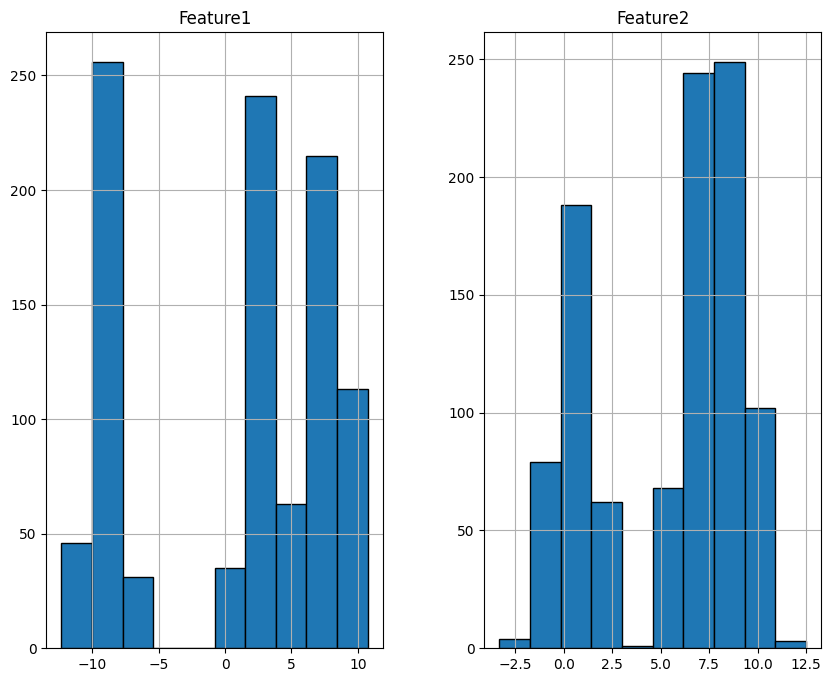

In [14]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8), bins=10, edgecolor='k')
plt.show()

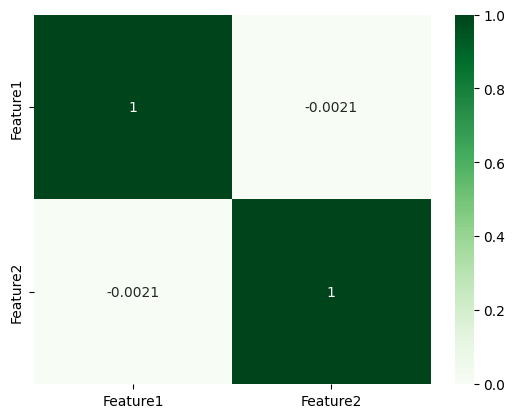

In [16]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

In [17]:
from sklearn.cluster import KMeans

wsse = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    wsse.append(km.inertia_)

In [18]:
wsse

[65721.46755751755,
 18161.697724367263,
 1942.6450661247954,
 1738.6961798075017,
 1523.541305344018,
 1301.5376839944274,
 1176.5867767409798,
 1036.3651932175837,
 860.904113739157,
 815.3690749043402]

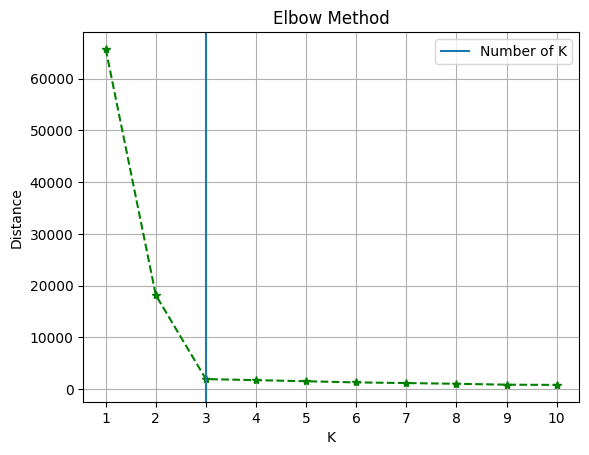

In [37]:
plt.plot(range(1,11), wsse, linestyle='--', marker='*', color='g')
plt.xticks([1,2,3,4,5,6,7,8,9, 10])
plt.axvline(3, label='Number of K')
plt.xlabel('K')
plt.ylabel('Distance')
plt.title('Elbow Method')
plt.legend()
plt.grid()
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [25]:
y_pred = kmeans.fit_predict(df)
y_pred

array([2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0,
       2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0,
       2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0,
       1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1,
       1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0,
       1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1,

In [26]:
kmeans.inertia_

1942.6450661247954

In [27]:
from sklearn.metrics import silhouette_score

Silhoutte_Score = silhouette_score(df, y_pred)
Silhoutte_Score

np.float64(0.8381643758856449)

In [31]:
kmeans.cluster_centers_

array([[-8.98571436,  6.92912196],
       [ 8.08765376,  8.80315162],
       [ 2.83727415,  0.45453403]])

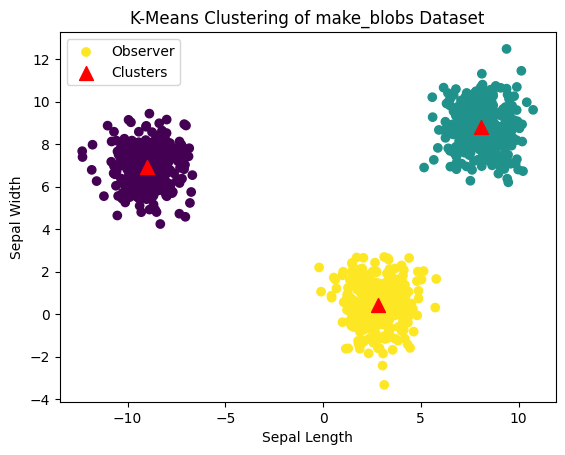

In [33]:
# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred, cmap='viridis', marker='o', label='Observer')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='^', label='Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('K-Means Clustering of make_blobs Dataset')
plt.show()

In [36]:
new_data = [[10,2]]

prediction = kmeans.predict(new_data)
prediction[0]

np.int32(1)

In [38]:
df.columns

Index(['Feature1', 'Feature2'], dtype='object')

In [43]:
import plotly.express as px

## Plot using Plotly
fig = px.scatter(df, 
                 x='Feature1', 
                 y='Feature2', 
                 color= y_pred,
                 title='make_blobs Dataset - Interactive Plotly Visualization')

fig.show()